<a href="https://colab.research.google.com/github/Ousmane0202/Projet-de-fin-de-licenc---Th-orie-de-l-information/blob/main/Copie_de_Ilustration_codage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import time
from collections import Counter, defaultdict, namedtuple
from heapq import heappush, heappop,heapify
from decimal import Decimal, getcontext
import matplotlib.pyplot as plt

In [ ]:
# Définition fonctionnelle d’un nœud de l’arbre avec comparaison personnalisée
class Noeud:
    def __init__(self, frequence, caractere=None, gauche=None, droite=None):
        self.frequence = frequence
        self.caractere = caractere
        self.gauche = gauche
        self.droite = droite

    # Méthode pour permettre la comparaison dans le tas
    def __lt__(self, other):
        return self.frequence < other.frequence

def est_feuille(noeud):
    return noeud.gauche is None and noeud.droite is None

def creer_feuille(caractere, frequence):
    return Noeud(frequence, caractere, None, None)

def creer_noeud_interne(gauche, droite):
    return Noeud(gauche.frequence + droite.frequence, None, gauche, droite)

# Construction de l’arbre de Huffman à partir d’un texte
def construire_arbre_huffman(texte):
    if not texte:
        return None
    frequences = Counter(texte)
    file_priorite = [creer_feuille(c, f) for c, f in frequences.items()]
    heapify(file_priorite)
    while len(file_priorite) > 1:
        g = heappop(file_priorite)
        d = heappop(file_priorite)
        heappush(file_priorite, creer_noeud_interne(g, d))
    return file_priorite[0]

# Construction récursive des codes de Huffman
def construire_codes(noeud, prefixe=''):
    if noeud is None:
        return {}
    if est_feuille(noeud):
        return {noeud.caractere: prefixe or '1'}  # Cas d’un seul caractère
    codes = {}
    codes.update(construire_codes(noeud.gauche, prefixe + '0'))
    codes.update(construire_codes(noeud.droite, prefixe + '1'))
    return codes

# Encodage d’un texte à l’aide des codes de Huffman
def encoder_texte(texte, codes):
    return ''.join(codes[car] for car in texte)

def huffman(texte):
    racine = construire_arbre_huffman(texte)
    return construire_codes(racine)

In [ ]:
def construire_code_shannon_fano(sous_liste, codes, prefixe=""):
    if len(sous_liste) == 1:
        symbole, _ = sous_liste[0]
        codes[symbole] = prefixe
        return

    # Calcul de la somme totale des probabilités
    somme_totale = sum(prob for _, prob in sous_liste)
    somme_partielle = 0
    indice_separation = 0

    # Trouver l’indice de coupure pour équilibrer les deux moitiés
    for i, (_, prob) in enumerate(sous_liste):
        somme_partielle += prob
        if somme_partielle >= somme_totale / 2:
            indice_separation = i + 1
            break

    # Répartition des codes dans les sous-listes gauche et droite
    construire_code_shannon_fano(sous_liste[:indice_separation], codes, prefixe + "0")
    construire_code_shannon_fano(sous_liste[indice_separation:], codes, prefixe + "1")

def codage_shannon_fano(dico_symboles_probabilites):
    # Transformer le dict en liste de tuples (symbole, prob) triée par prob décroissante
    liste_triee = sorted(dico_symboles_probabilites.items(), key=lambda x: x[1], reverse=True)
    codes = {}
    construire_code_shannon_fano(liste_triee, codes)
    return codes


In [ ]:
# Codage Arithmétique
getcontext().prec = 1500   # la précision numérique (1500 chiffres après la virgule)

def ConstructionModele(freq):
    total = sum(freq.values())
    borne_inf = Decimal(0)
    bornes = {}
    for c, p in sorted(freq.items()):
        p = Decimal(p) / Decimal(total)
        bornes[c] = (borne_inf, borne_inf + p)
        borne_inf += p
    return bornes

def codage_arithmetique_decimal(message, bornes):
    BInf, BSup = Decimal(0), Decimal(1)
    for symbole in message:
        BI, BS = bornes[symbole]  # Bornes de l'intervalle du symbole
        Taille = BSup - BInf      # Taille de l'intervalle courant
        BSup = BInf + Taille * BS
        BInf = BInf + Taille * BI
    return BInf, BSup


In [ ]:
def lz78_encode(texte):
    dictionnaire = {}
    sortie = []
    courant = ""
    index = 1

    for caractere in texte:
        temp = courant + caractere
        if temp not in dictionnaire:
            if courant == "":
                sortie.append((0, caractere))
            else:
                sortie.append((dictionnaire[courant], caractere))
            dictionnaire[temp] = index
            index += 1
            courant = ""
        else:
            courant = temp

    if courant != "":
        sortie.append((dictionnaire[courant], ""))

    return sortie


In [ ]:
def evaluation_methodes(alphabet, distribution, N, NbMin, NbMax):
    # liste des longueures moyenne pour chaque méthode
    L_huff_list = []
    L_sf_list = []
    L_arith_list = []
    L_lz78_list = []
    entropies = []

    # Liste contenant le temps d'exécution de chaque méthode
    temp_arith = []
    temp_huff = []
    temp_shano = []
    temp_lz78 = []

    for _ in range(N):
        # Génération d’un message aléatoire
        if distribution == 'U':  # uniforme
            message = ''.join(random.choices(alphabet, k=random.randint(NbMin, NbMax)))
            freq = Counter(message)
        elif distribution == 'N':  # naturelle
            french_freq_percent = {
                'a': 8.1, 'b': 0.9, 'c': 3.3, 'd': 3.7, 'e': 15.0,
                'f': 1.1, 'g': 1.3, 'h': 0.8, 'i': 6.3, 'j': 0.3,
                'k': 0.1, 'l': 5.1, 'm': 2.9, 'n': 5.5, 'o': 4.9,
                'p': 2.9, 'q': 0.8, 'r': 5.4, 's': 6.1, 't': 5.9,
                'u': 5.3, 'v': 1.9, 'w': 0.1, 'x': 0.4, 'y': 0.5,
                'z': 0.1, ' ': 15.0
            }
            population = list(french_freq_percent.keys())
            weights = [french_freq_percent[c] for c in population]
            message = ''.join(random.choices(population, weights=weights, k=random.randint(NbMin, NbMax)))
            freq = Counter(message)
        else:
            print("Distribution non reconnue : utiliser 'U' (uniforme) ou 'N' (naturelle)")
            return

        total = sum(freq.values())
        probas = {k: v / total for k, v in freq.items()}

        # Entropie
        H = -sum(p * math.log2(p) for p in probas.values())
        entropies.append(H)

        # Huffman
        debut = time.time()
        huff_codes = huffman(message)
        fin = time.time()
        L_huff = sum(len(huff_codes[c]) * freq[c] for c in freq) / total
        L_huff_list.append(L_huff)
        temp_huff.append(fin-debut)

        # Shannon-Fano
        debut = time.time()
        code_shannon = codage_shannon_fano(freq)
        fin = time.time()
        L_sf = sum(len(code_shannon[c]) * freq[c] for c in freq) / total
        L_sf_list.append(L_sf)
        temp_shano.append(fin-debut)

        # Arithmétique
        borne = ConstructionModele(probas)
        debut = time.time()
        BInf, BSup = codage_arithmetique_decimal(message, borne)
        fin = time.time()

        epsilon = Decimal('1e-1500')  # valeur minimale pour éviter log(0)
        delta = max(BSup - BInf, epsilon)
        L_arith = -(delta.ln() / Decimal(2).ln()) / total
        L_arith_list.append(L_arith)
        temp_arith.append(fin-debut)

        # LZ78
        debut = time.time()
        lz78 = lz78_encode(message)
        fin = time.time()
        nb_bits_index = math.ceil(math.log2(len(lz78) + 1)) if len(lz78) > 1 else 1
        nb_bits_char = math.ceil(math.log2(len(alphabet)))
        total_bits = sum(nb_bits_index + nb_bits_char if symb else nb_bits_index for _, symb in lz78)
        L_lz78 = total_bits / len(message)
        L_lz78_list.append(L_lz78)
        temp_lz78.append(fin-debut)

    # Affichage graphique
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].plot(entropies, label='Entropie (théorique)', linestyle='--', color='red')
    axes[0].plot(L_huff_list, label='Huffman', marker='o', markersize=3)
    axes[0].plot(L_sf_list, label='Shannon-Fano', marker='x', markersize=3)
    axes[0].plot(L_arith_list, label='Arithmétique', linestyle='dotted', color='blue')
    axes[0].plot(L_lz78_list, label='LZ78', marker='s', markersize=3, color='green')
    axes[0].set_title(f"Comparaison des longueurs moyennes sur {N} messages ({'naturelle' if distribution=='N' else 'uniforme'})")
    axes[0].set_xlabel("Message n°")
    axes[0].set_ylabel("Longueur moyenne (bits/symbole)")
    axes[0].legend()
    axes[0].grid(True)

    # Temps moyens
    moy_temps = [
    sum(temp_huff) / N,
    sum(temp_shano) / N,
    sum(temp_arith)/N,
    sum(temp_lz78) / N
    ]

    labels = ['Huffman', 'Shannon-Fano','Arithmétique','LZ78']
    couleur = ['#007ACC', '#F57C00','#9C27B0','#388E3C']

    axes[1].bar(labels, moy_temps, color=couleur)
    axes[1].set_title('Temps moyen d\'exécution par méthode')
    axes[1].set_ylabel('Temps (secondes)')
    axes[1].grid(axis='y')

    plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    plt.show()


    # Affichage des moyennes
    print("\n--- Moyennes sur", N, "messages ---")
    print("Entropie moyenne        :", round(sum(entropies) / N, 4))
    print("Arithmétique moyen      :", round(sum(L_arith_list) / N, 4))
    print("Huffman moyen           :", round(sum(L_huff_list) / N, 4))
    print("Shannon-Fano moyen      :", round(sum(L_sf_list) / N, 4))
    print("LZ78 moyen              :", round(sum(L_lz78_list) / N, 4))
    print("Efficacité Huffman      :", round(sum(entropies[i] / L_huff_list[i] for i in range(N)) / N, 4))
    print("Efficacité Shannon-Fano :", round(sum(entropies[i] / L_sf_list[i] for i in range(N)) / N, 4))
    print("Efficacité LZ78         :", round(sum(entropies[i] / L_lz78_list[i] for i in range(N)) / N, 4))

**Cas d'une distribution uniforme et d'un méssge court**

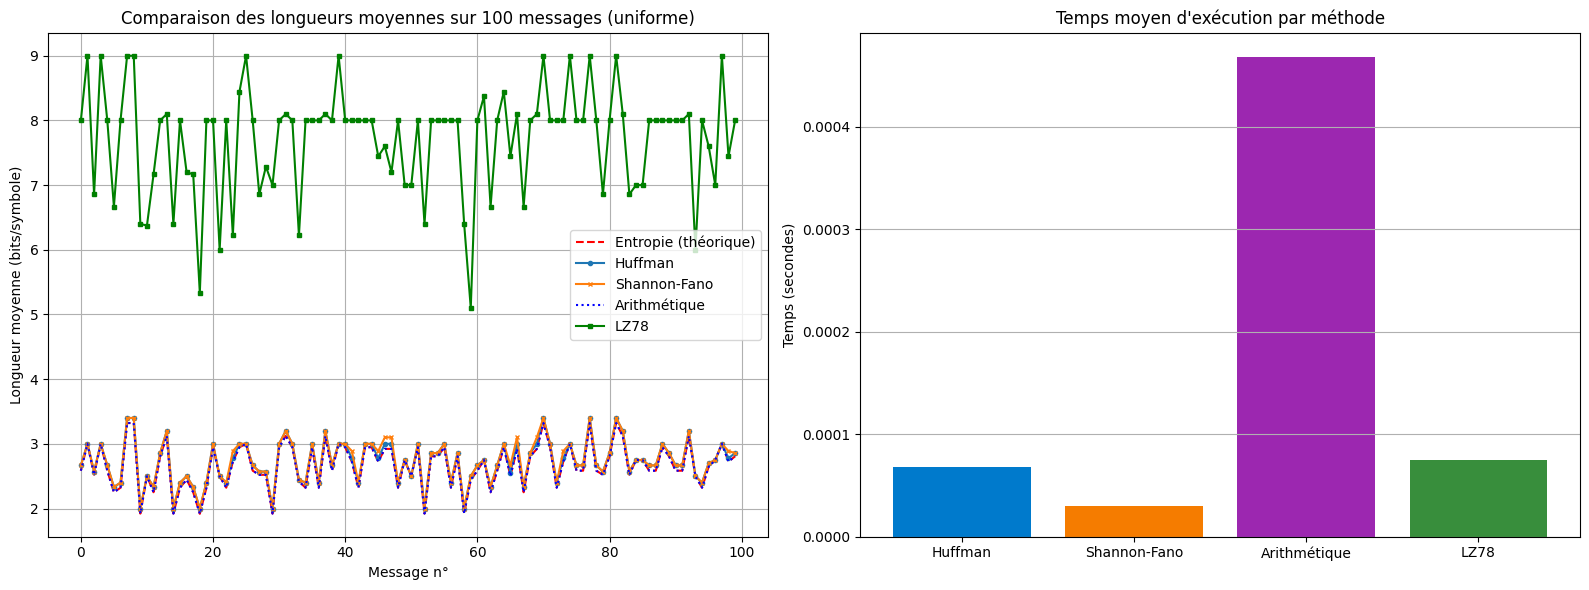


--- Moyennes sur 100 messages ---
Entropie moyenne        : 2.6707
Arithmétique moyen      : 2.6707
Huffman moyen           : 2.7279
Shannon-Fano moyen      : 2.7385
LZ78 moyen              : 7.708
Efficacité Huffman      : 0.9784
Efficacité Shannon-Fano : 0.9749
Efficacité LZ78         : 0.3476


In [ ]:
alphabet = list("abcdefghijklmnopqrstuvwxyz ")
N = 100  # nombre de messages à générer
NbMin, NbMax = 5,10
evaluation_methodes(alphabet,'U', N,NbMin, NbMax)

**Cas d'une distribution uniforme et d'un méssage long**

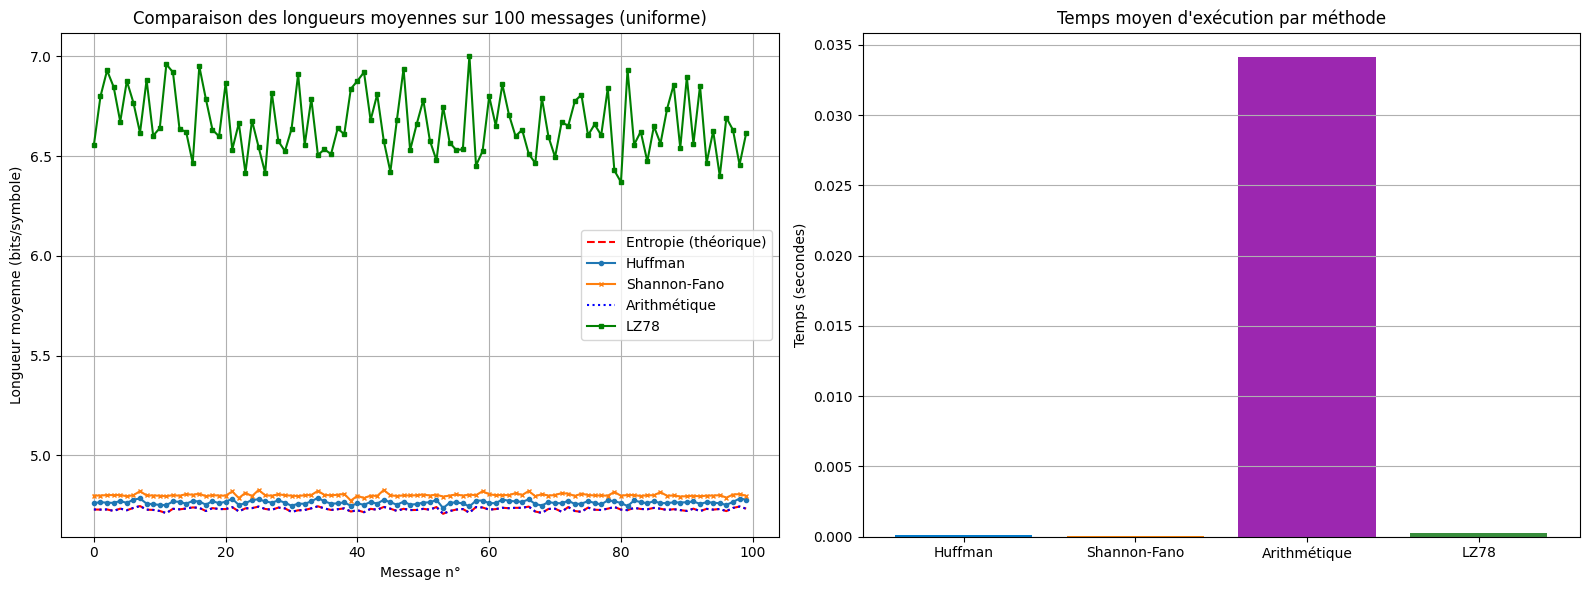


--- Moyennes sur 100 messages ---
Entropie moyenne        : 4.7297
Arithmétique moyen      : 4.7297
Huffman moyen           : 4.7637
Shannon-Fano moyen      : 4.8012
LZ78 moyen              : 6.6632
Efficacité Huffman      : 0.9928
Efficacité Shannon-Fano : 0.9851
Efficacité LZ78         : 0.7102


In [ ]:
alphabet = list("abcdefghijklmnopqrstuvwxyz ")
N = 100  # nombre de messages à générer
NbMin, NbMax = 500,1000
evaluation_methodes(alphabet,'U', N,NbMin, NbMax)

**Cas d'une distribution Naturelle et d'un méssage court**

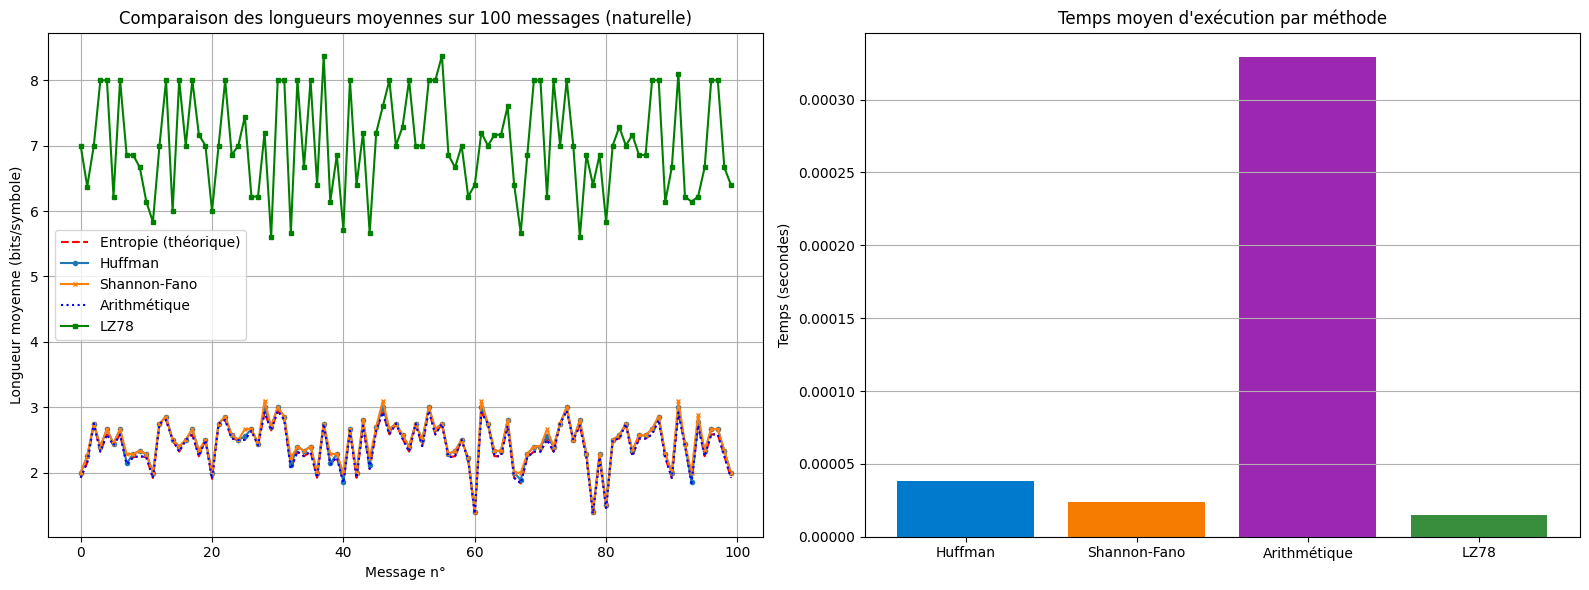


--- Moyennes sur 100 messages ---
Entropie moyenne        : 2.4071
Arithmétique moyen      : 2.4071
Huffman moyen           : 2.4584
Shannon-Fano moyen      : 2.4748
LZ78 moyen              : 7.0259
Efficacité Huffman      : 0.9786
Efficacité Shannon-Fano : 0.972
Efficacité LZ78         : 0.3437


In [ ]:
alphabet = list("abcdefghijklmnopqrstuvwxyz ")
N = 100  # nombre de messages à générer
NbMin, NbMax = 5,10
evaluation_methodes(alphabet,'N', N,NbMin, NbMax)

**Cas d'une distribution Naturelle et d'un méssage long**

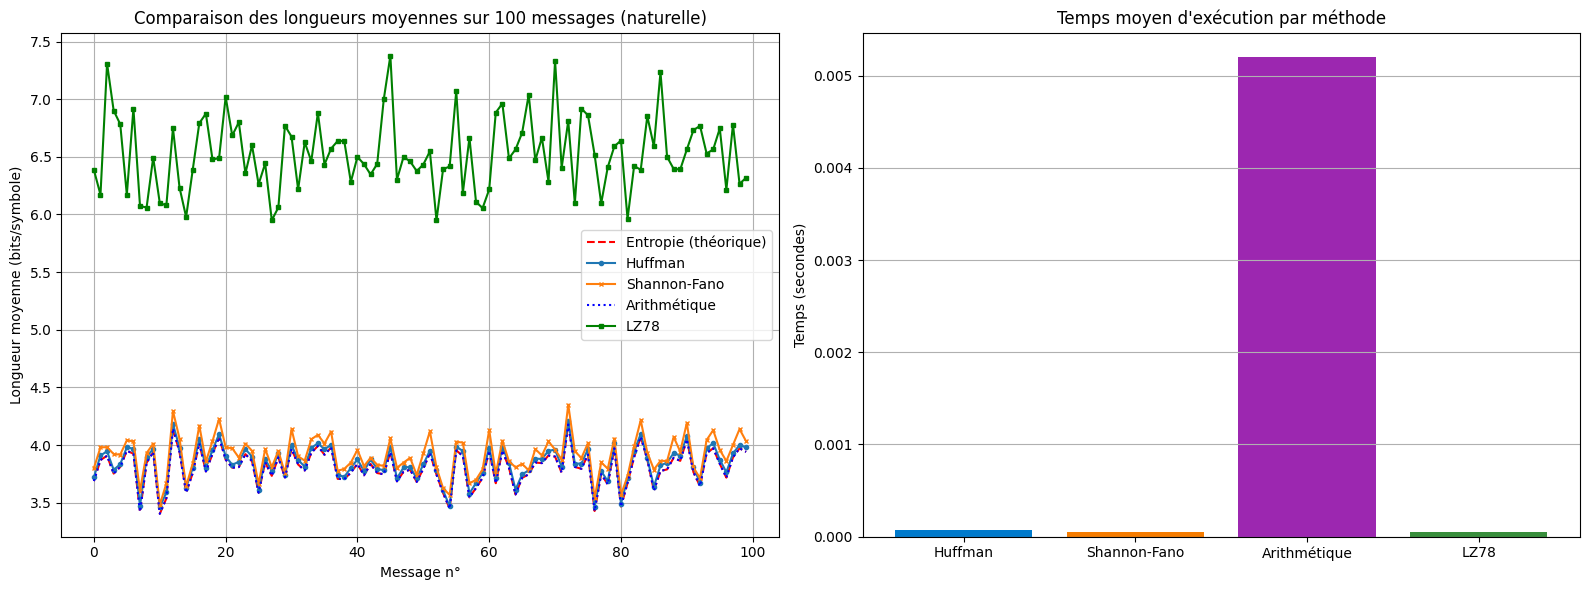


--- Moyennes sur 100 messages ---
Entropie moyenne        : 3.8064
Arithmétique moyen      : 3.8064
Huffman moyen           : 3.8429
Shannon-Fano moyen      : 3.9111
LZ78 moyen              : 6.5257
Efficacité Huffman      : 0.9905
Efficacité Shannon-Fano : 0.9734
Efficacité LZ78         : 0.5844


In [ ]:
alphabet = list("abcdefghijklmnopqrstuvwxyz ")
N = 100  # nombre de messages à générer
NbMin, NbMax = 50,100
evaluation_methodes(alphabet,'N', N,NbMin, NbMax)

**Conclusion**

- On observe que le codage arithmétique atteint une longueur moyenne de code très proche de l'entropie, quelle que soit la distribution (uniforme ou naturelle).

- Huffman se positionne juste après le codage arithmétique et est plus efficace que celui de shannon-fano quelque soit la distribution. précisement, les deux se rapprochent davantage de l'entropie lorsque la distribution des caractères est uniforme, par rapport à une distribution naturelle.

- Quant à lempel ziv, en général, il est de loin moins optimal que ceux cités ci-haut. il est judicieux de l'utiliser dans le contexte où on a un texte avec des motifs réccurents, ou si l'on ne connait pas à priori la distribution.

- En terme de complexité temporelle, lempel zif et le codage arithmétique sont respectivement les plus rapides pour les messages courts. Toutefois, le temps d'exécution de l'arithmétique augmente fortement avec la longueur du message. cela est dû à la gestion fine de la précision numérique nécessaire pour garantir un codage exact. Shannon-fano et huffman occupent respectivement les deux premières places.

- En résumé, le codage arithmétique est le plus adapté pour les messages courts, lempel zif pour des messages très longs avec motifs réccurents et/ou une distribution à priori inconnue et huffman est le plus adaptés pour les autres cas.
